In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# day_length_weight = pd.read_csv("https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/day_length_weight.csv")
day_length_weight = pd.read_csv("./day_length_weight.csv")
day_length_weight_tensor = torch.tensor(day_length_weight.values, dtype=torch.float)

x_train = day_length_weight_tensor[:,1:3].reshape(-1, 2)
y_train = day_length_weight_tensor[:, 0].reshape(-1,1)

print(x_train[1:5])

tensor([[92.8221, 14.7191],
        [98.5218, 21.0195],
        [85.6332, 12.7910],
        [75.2944, 10.5395]])


In [3]:
class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.randn((2,1), requires_grad=True) #[[a1, a2]] 
        self.b = torch.randn((1,1), requires_grad=True)

    # Predictor
    def f(self, x):
        return x @ self.W + self.b  # @ corresponds to matrix multiplication
    
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability

In [4]:
model = LinearRegressionModel()
print(model.W)
optimizer = torch.optim.SGD([model.W, model.b], lr=0.00000075)
# optimizer = torch.optim.Adagrad([model.W, model.b], lr=50)

tensor([[-1.5539],
        [-1.4558]], requires_grad=True)


In [5]:
for epoch in range(10000):
	loss = model.loss(x_train, y_train).backward()
	optimizer.step()

	# print(f'epoch = {epoch}, loss= {model.loss(x_train, y_train)}, W = {model.W}, b = {model.b}')

	optimizer.zero_grad()

In [6]:
print(f'W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}')

W = tensor([[9.6876],
        [8.6366]], requires_grad=True), b = tensor([[-1.8602]], requires_grad=True), loss = 139685.046875


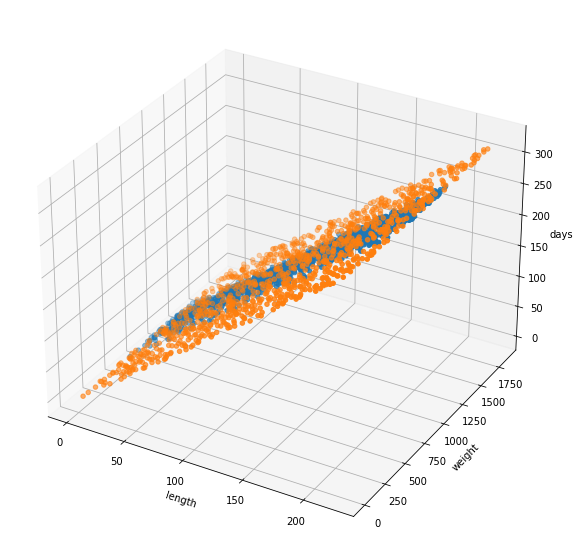

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = torch.linspace(0, int(torch.max(x_train[1:, 1:]).item())+200, 1000)
z = torch.linspace(0, int(torch.max(x_train[1:, 0:1]).item())+200, 1000)
Y = model.f(x_train).detach()

ax.scatter(x,Y,z)
ax.scatter(x,y_train, z)

ax.set_xlabel('length')
ax.set_ylabel('weight')
ax.set_zlabel('days')

plt.show()